In [30]:
import math
import matplotlib.pyplot as plt
import numpy as np

def lee_archivo(archivo):
	f = open(archivo, "r")
	contenido = f.read()
	f.close()

	lines = contenido.split("\n")
	n = int(lines[0])
	points = [ list(map(float, lines[i].split("\t")))  for i in range(1, len(lines)-1 )]

	return n, points

In [31]:
# Calcula el angulo que 2 puntos forman
# usa math.atan() y math.degrees( )

def get_angle(p1, p2):
    dy = p1[1] - p2[1]
    dx = p1[0] - p2[0]

    angle = math.degrees(math.atan2(dy, dx))

    return angle


In [32]:
#  0 =  son colineales
#  1 = p3 esta en el sentido del reloj
# -1 = p3 esta counterclockwise
def orientacion(p1, p2, p3):
    val = (p2[1] - p1[1]) * (p3[0] - p2[0]) - (p2[0] - p1[0]) * (p3[1] - p2[1])
    
    if val == 0:
        return 0
    
    elif val > 0:
        return 1
    
    else:
        return -1

    

In [33]:
def find_hull(n, puntos):
  # Obten el menor punto de acuerdo a la coordenada y
  # min(lista,  key = lambda param : returned_value  )
  lowest_point = min( puntos, key = lambda x: x[1] )

  # Obten el angulo de cada uno de los otros puntos
  # con respecto a lowest_point
  for i in range(n):
    puntos[i].append(get_angle(puntos[i], lowest_point))

  # ordena los puntos con respecto al angulo que forman con lowest_point
  puntos_sorted = sorted(puntos, key = lambda x: x[2])

  # Agrega los tres primeros puntos(ordenados) en la stack
  # Spoiler: al final del proceso, los puntos elegidos se quedan en la stack
  stack = []
  stack.append(puntos_sorted[0])
  stack.append(puntos_sorted[1])
  stack.append(puntos_sorted[2])

  # Para cada uno del resto de los puntos...
  for i in range(3, n):
    # Mientras la stack tenga 2 o mas puntos..
    while len(stack) >= 2:
      # Revisa la orientacion del punto actual con respecto
      # a los dos ultimos puntos de la stack
      o = orientacion(stack[-2], stack[-1], puntos_sorted[i])

      # Si la orientacion es clockwise, los tres puntos forman un angulo concavo
      if o == 1:
        # Asi que el ultimo punto de la stack no deberia ser parte de la hull
        # Remuevelo de la stack
        stack.pop()

      # Si la orietacion no es clockwise, no hace falta eliminar nada. Rompe el while
      else:
        break

    # Fuera del while, agrega el punto actual a la stack
    stack.append(puntos_sorted[i])

  # Al final del proceso, devuelve la stack y el punto lowest_point
  return [stack, lowest_point]


In [34]:
def draw_hull( puntos, elegidos, lowest, text):
    # Esto grafica todos los puntos con colores random, y semi-trasparentes
    colors = np.random.rand(len(puntos))
    plt.scatter([p[0] for p in puntos], [p[1] for p in puntos], c=colors, alpha=0.5)

    # Usa scatters similares para graficar los puntos elegidos y el lowest
    plt.scatter([p[0] for p in elegidos], [p[1] for p in elegidos], c='red', alpha=0.8)
    plt.scatter([lowest[0]], [lowest[1]], c='blue', alpha=0.8)

    # Usa plot para graficar el poligono
    plt.plot([p[0] for p in elegidos + [elegidos[0]] ], [p[1] for p in elegidos + [elegidos[0]] ], c='green')

    # text es el nombre de la instancia de prueba, agregado como texto a la grafica
    plt.title(text)

    plt.show()

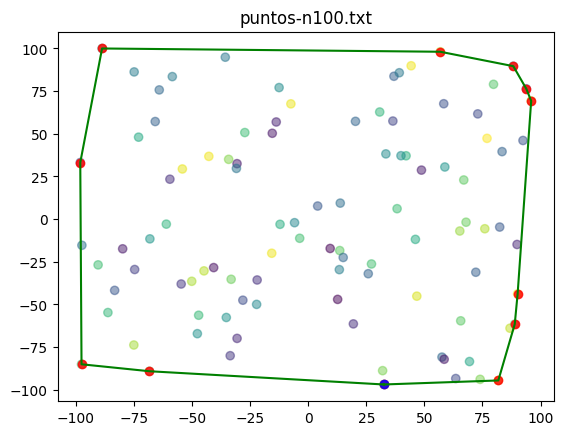

In [35]:
# Por cada instancia....

# 1. Lee los puntos
file_name = "puntos-n100.txt"
n, puntos = lee_archivo( file_name )

# 2. Calcula la convex hull
hull, lowest_point = find_hull(n, puntos)

# 3. Y grafica...
draw_hull(puntos, hull, lowest_point, file_name)